In [2]:
!pip install xgboost

In [1]:
import xgboost as xgb
#from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
raw_dataset = pd.read_csv('G_datasets-AEA.csv')
x = raw_dataset.iloc[:, : -1].values
y = raw_dataset.iloc[:, 6].values
raw_dataset

,Temp,WC,NL,N(UC),Fe(UC),B(UC),Diameter of Bulb
0,18.3,0.11,5.75,10.99,7.64,14.89,16.03
1,19.8,0.22,5.79,11.00,7.71,15.01,16.04
2,18.3,0.31,5.83,11.01,7.84,15.02,16.05
3,16.9,0.42,5.87,11.02,8.66,15.03,16.06
4,18.9,0.56,5.91,11.03,8.79,15.05,16.07
...,...,...,...,...,...,...,...
86,29.5,15.18,10.23,8.41,35.29,25.82,103.39
87,27.9,15.21,10.34,8.34,36.07,25.88,103.47
88,27.1,15.27,10.48,8.32,36.18,25.95,103.49
89,26.1,15.30,10.51,8.31,37.34,26.90,103.52


In [3]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.15)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, ...)
Training score:  0.9999999983765635
Mean cross-validation score: 0.99
K-fold CV average score: 0.99
MSE: 5.12
RMSE: 2.26


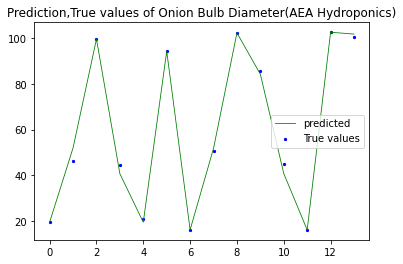

In [9]:
xgbr = xgb.XGBRegressor(verbosity=0)
print(xgbr)

xgbr.fit(xtrain, ytrain)
 
score = xgbr.score(xtrain, ytrain)   
print("Training score: ", score) 
 
# - cross validataion 
scores = cross_val_score(xgbr, xtrain, ytrain, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, xtrain, ytrain, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())
 
ypred = xgbr.predict(xtest)
r2 = 1 - sum((ytest - ypred) ** 2)/sum((ytest - np.mean(ytest)) ** 2)
#r2 = r2_score(ytest,ypred)
mse = mean_squared_error(ytest, ypred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))

x_ax = range(len(ytest))
plt.title('Prediction,True values of Onion Bulb Diameter(AEA Hydroponics)')
plt.scatter(x_ax, ytest, s=5, color="blue", label="True values")
plt.plot(x_ax, ypred, lw=0.8, color="green", label="predicted")
plt.legend()
plt.show()

In [5]:
print('ypred =',ypred)

ypred = [ 21.960583  18.312563  20.674852  83.17698   66.75031  103.46299
  18.255901  20.634287 102.59425   44.511265  19.553713 102.76054
  50.894028  91.90979 ]


In [6]:
print('r2_score = ',r2)

r2_score =  0.9952561716180253
